<a href="https://colab.research.google.com/github/joseluan/ml_magalu/blob/main/Magalu_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import gdown


In [30]:

nome_arquivo = 'magalu.csv'
# Baixando o csv das ofertas
gdown.download(url='https://drive.google.com/file/d/1PY0Jea-Mu1dohKDaCkjA9ppvAGRuRwA2/view?usp=sharing', output=nome_arquivo, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1PY0Jea-Mu1dohKDaCkjA9ppvAGRuRwA2
To: /content/magalu.csv
100%|██████████| 94.1k/94.1k [00:00<00:00, 2.18MB/s]


'magalu.csv'

In [38]:
dataframe = pd.read_csv(nome_arquivo) # Carregando o csv das ofertas


##Pre-processamento

In [39]:
dataframe = dataframe[dataframe['status'] != 'FINISHED'] # Retirando ofertas antigas
dataframe['status'] = dataframe['status'].replace('APPROVED', 1) # Mudando o valor de string para int
#dataframe['status'] = dataframe['status'].replace('FINISHED', 0) # Mudando o valor de string para int
dataframe['status'] = dataframe['status'].replace('REPPROVED', 0) # Mudando o valor de string para int

#Retirando linhas quando os valores de historico de ano, 6 meses e 3 meses do zoom forem igual a zero
dataframe = dataframe[dataframe['average_year'] > 0]
dataframe = dataframe[dataframe['var_year'] > 0]
dataframe = dataframe[dataframe['std_year'] > 0]

dataframe = dataframe[dataframe['average_six_months'] > 0]
dataframe = dataframe[dataframe['var_six_months'] > 0]
dataframe = dataframe[dataframe['std_six_months'] > 0]

dataframe = dataframe[dataframe['average_three_months'] > 0]
dataframe = dataframe[dataframe['var_three_months'] > 0]
dataframe = dataframe[dataframe['std_three_months'] > 0]

del dataframe['nome']


<ipython-input-39-2ca9c95a5bfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['status'] = dataframe['status'].replace('APPROVED', 1) # Mudando o valor de string para int
<ipython-input-39-2ca9c95a5bfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['status'] = dataframe['status'].replace('REPPROVED', 0) # Mudando o valor de string para int


In [40]:
# Separando os dados entre treinamento e treino
X = dataframe.iloc[:,1:]
# a última coluna se refere a classe
y = dataframe.loc[:,'status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 403 to 358
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   old_price             296 non-null    float64
 1   average_year          296 non-null    float64
 2   var_year              296 non-null    int64  
 3   std_year              296 non-null    int64  
 4   average_six_months    296 non-null    float64
 5   var_six_months        296 non-null    float64
 6   std_six_months        296 non-null    float64
 7   average_three_months  296 non-null    float64
 8   var_three_months      296 non-null    float64
 9   std_three_months      296 non-null    float64
 10  status                296 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 27.8 KB


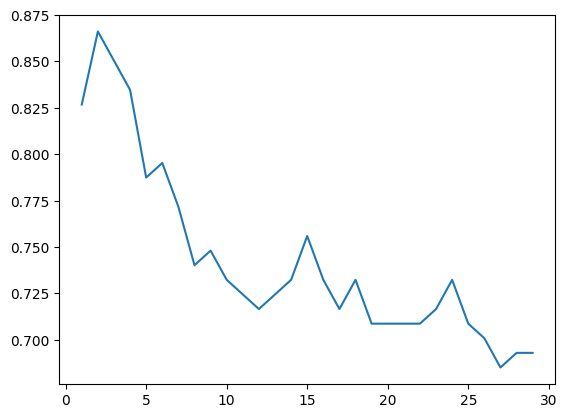

In [41]:
k_range = range(1,30)
scores = {}
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)


plt.plot(k_range,list(scores.values()))

In [49]:
print(sorted(scores, key=lambda x: scores[x], reverse=True ))

[2, 3, 4, 1, 6, 5, 7, 15, 9, 8, 10, 14, 16, 18, 24, 11, 13, 12, 17, 23, 19, 20, 21, 22, 25, 26, 28, 29, 27]


##Avaliando com outras metricas

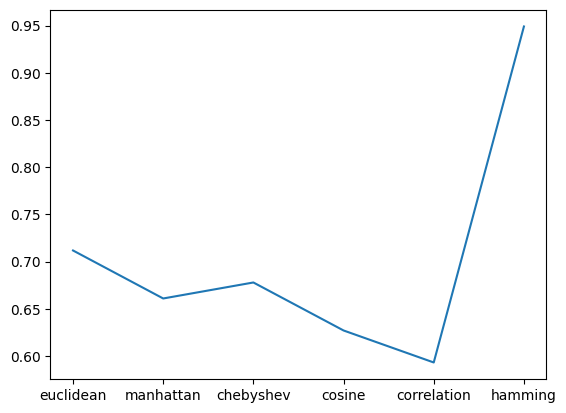

In [37]:
metricas = ['euclidean','manhattan', 'chebyshev', 'cosine', 'correlation', 'hamming']
scores = {}
for metrica in metricas:
  knn = KNeighborsClassifier(n_neighbors=2, metric=metrica)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[metrica] = accuracy_score(y_test,y_pred)


plt.plot(metricas,list(scores.values()))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2, metric='hamming')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))